Team : 22

SRN: PES1UG20CS065 - SECTION B
     PES1UG20CS069 - SECTION B
     PES1UG20CS314 - SECTION F
     PES1UG20CS388 - SECTION G

PROJECT NAME: EXPLORING LANGUAGE RELATIONSHIPS

INSTRUCTIONS TO RUN THE FILE:
1. DOWNLOAD https://github.com/anoopkunchukuttan/indic_nlp_library and change path of variable 'INDIC_NLP_LIB_HOME'to respective downloaded path

2. DOWNLOAD https://github.com/anoopkunchukuttan/indic_nlp_resources and change path of variable 'INDIC_NLP_RESOURCES'to respective downloaded path

3. Change path of python to the path of python in your respective system in cell (sys.path.append(r'<path_to_python>.format(INDIC_NLP_LIB_HOME))

4. Change the path of the dataset to the drive link provided

5. Run the entire notebook


In [52]:
import pandas as pd

# IMPORTING NECESSARY LIBRARIES

In [53]:
# The path to the local git repo for Indic NLP library
INDIC_NLP_LIB_HOME=r"/Users/punarvdinakar/Documents/sem_6/nam/project/indic_nlp_library"

# The path to the local git repo for Indic NLP Resources
INDIC_NLP_RESOURCES=r"/Users/punarvdinakar/Documents/sem_6/nam/project/indic_nlp_resources"

In [54]:
import sys
sys.path.append(r'/usr/bin/python3'.format(INDIC_NLP_LIB_HOME))

In [55]:
!pip install indic-nlp-library
from indicnlp import common
common.set_resources_path(INDIC_NLP_RESOURCES)


[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [56]:
from indicnlp import loader
loader.load()

In [57]:
dataset = pd.read_csv('/Users/punarvdinakar/Documents/sem_6/nam/project/Dataset_13_lang.csv')

In [58]:
dataset.shape[1]

15

In [59]:
from indicnlp.script import  indic_scripts as isc
from indicnlp.script import  phonetic_sim as psim

# Removing English and Urdu from language list

In [60]:
dataset = dataset[dataset.columns[1:]]

In [61]:
dataset = dataset.drop(['URDU'], axis=1)

In [62]:
dataset[:5]

,SANSKRIT,HINDI,GUJARATI,TAMIL,TELUGU,KANNADA,ORIYA,MARATHI,NEPALI,BENGALI,MALAYALAM,FRENCH,DUTCH
0,सुप्रभातम्‌,शुभ प्रभात,સુપ્રભાત,காலை வணக்கம்,శుభోదయం,ಶುಭೋದಯ,ଶୁଭ ସକାଳ,शुभ प्रभात,शुभ - प्रभात,সুপ্রভাত,സുപ്രഭാതം,bonjour,Goedemorgen
1,नमस्ते,नमस्ते,નમસ્તે,வணக்கம்,హలో,ನಮಸ್ಕಾರ,ନମସ୍କାର,नमस्कार,अभिवादन,হ্যালো,ഹലോ,Bonjour,Hallo
2,अहम्‌,मुझे,મને,நான்,నేను,ನಾನು,ମୁଁ,मी,म,আমাকে,എന്നോട്,moi,mij
3,त्वम्‌,आप,તું,நீங்கள்,మీరు,ನೀವು,ତୁମେ,आपण,तिमीहरु,আপনি,നിങ്ങൾ,toi,Jij
4,खादतु,खाना,ખાવું,சாப்பிடுங்கள்,తినండి,ತಿನ್ನು,ଖାଅ,खा,खानु,খাওয়া,കഴിക്കുക,manger,eten


In [63]:
languages = ['sa', 'hi', 'gu', 'ta', 'te', 'kn', 'or', 'mr', 'ne', 'bn', 'ml' ]

In [64]:
dataset2 = dataset

# Romanising the dataset

### (Writing the language into the latin text)

In [65]:
from indicnlp.transliterate.unicode_transliterate import ItransTransliterator

for rowIndex, row in dataset.iterrows(): 
    i = 0
    for columnIndex, value in row.items():
        if(dataset.columns.get_loc(columnIndex) < 11):
            input_text = value
            lang = languages[i]
            i = i + 1
            romanised = ItransTransliterator.to_itrans(input_text,lang)
            dataset2.iloc[rowIndex, dataset.columns.get_loc(columnIndex)] = romanised

In [66]:
dataset2[:10]

,SANSKRIT,HINDI,GUJARATI,TAMIL,TELUGU,KANNADA,ORIYA,MARATHI,NEPALI,BENGALI,MALAYALAM,FRENCH,DUTCH
0,suprabhaatam‌,shubha prabhaata,suprabhaata,kaalai vaNakkam,shubhodaya.m,shubh.uuॕdaya,shubha sakaalda,shubha prabhaata,shubha - prabhaata,suprabhaata,suprabhaata.m,bonjour,Goedemorgen
1,namaste,namaste,namaste,vaNakkam,halo,namaskaara,namaskaara,namaskaara,abhivaadana,hyaalo,halaa,Bonjour,Hallo
2,aham‌,mujhe,mane,naa*n,nenu,naanu,muँ,mii,ma,aamaake,.ennoT,moi,mij
3,tvam‌,aapa,tu.m,nii~Nkald,miiru,niivu,tume,aapaNa,timiiharu,aapani,ni~N~Nald,toi,Jij
4,khaadatu,khaanaa,khaavu.m,chaappiTu~Nkald,tina.mDi,tinnu,khaaa,khaa,khaanu,khaaoyaaa,kazhikkuka,manger,eten
5,kriiDatu,khela,rama,vildaiyaaTu~Nkald,aaDa.mDi,nuDisu,khelda,kheldaa,khelnu,kheluna,kaldikkuka,jouer,toneelstuk
6,nR^itya.m,nR^itya,nR^itya,naTa*nam,Daans,nR^itya,nR^itय़,nR^itya,naacha,naacha,nR^itta.m,danse,dans
7,adhyaapakaH,adhyaapaka,shikShaka,aachiriyar,guruvu,shikShaka,shikShaka,shikShaka,shikShaka,shikShaka,addhaapika,professeur,docent
8,niila,niilaa,vaadaldii,niilam,niila.m,niॕli,niilda,nildaa,niilo,niila,niilayaaya,bleu,blauw
9,rakta,laala,laala,chivappu,.erupu,k.e.mpu,naali,laala,raato,laala,chuvappaaya,rouge,rood


# Cleaning the data

In [67]:
import re
import string

translator = str.maketrans('', '', string.punctuation)

for rowIndex, row in dataset.iterrows(): 
    for columnIndex, value in row.items():
        text = value
        text = re.sub(r'\n', '', text)
        text = text.translate(translator)
        dataset2.iloc[rowIndex, dataset.columns.get_loc(columnIndex)] = text

In [68]:
dataset2[:10]

,SANSKRIT,HINDI,GUJARATI,TAMIL,TELUGU,KANNADA,ORIYA,MARATHI,NEPALI,BENGALI,MALAYALAM,FRENCH,DUTCH
0,suprabhaatam‌,shubha prabhaata,suprabhaata,kaalai vaNakkam,shubhodayam,shubhuuॕdaya,shubha sakaalda,shubha prabhaata,shubha prabhaata,suprabhaata,suprabhaatam,bonjour,Goedemorgen
1,namaste,namaste,namaste,vaNakkam,halo,namaskaara,namaskaara,namaskaara,abhivaadana,hyaalo,halaa,Bonjour,Hallo
2,aham‌,mujhe,mane,naan,nenu,naanu,muँ,mii,ma,aamaake,ennoT,moi,mij
3,tvam‌,aapa,tum,niiNkald,miiru,niivu,tume,aapaNa,timiiharu,aapani,niNNald,toi,Jij
4,khaadatu,khaanaa,khaavum,chaappiTuNkald,tinamDi,tinnu,khaaa,khaa,khaanu,khaaoyaaa,kazhikkuka,manger,eten
5,kriiDatu,khela,rama,vildaiyaaTuNkald,aaDamDi,nuDisu,khelda,kheldaa,khelnu,kheluna,kaldikkuka,jouer,toneelstuk
6,nRityam,nRitya,nRitya,naTanam,Daans,nRitya,nRitय़,nRitya,naacha,naacha,nRittam,danse,dans
7,adhyaapakaH,adhyaapaka,shikShaka,aachiriyar,guruvu,shikShaka,shikShaka,shikShaka,shikShaka,shikShaka,addhaapika,professeur,docent
8,niila,niilaa,vaadaldii,niilam,niilam,niॕli,niilda,nildaa,niilo,niila,niilayaaya,bleu,blauw
9,rakta,laala,laala,chivappu,erupu,kempu,naali,laala,raato,laala,chuvappaaya,rouge,rood


# Generating soundex values for each cell

### (Soundex is a phonetic algorithm that can locate phrases with similar sounds.)

In [69]:
# soundex generator function
def soundex_generator(token):
    # Convert the word to upper
    # case for uniformity
    token = token.upper()

    soundex = ""

    soundex += token[0]

    dictionary = {"BFPV": "1", "CGJKQSXZ": "2",
                  "DT": "3","L": "4", "MN": "5", "R": "6","AEIOUHWY": "."}

    for char in token[1:]:
        for key in dictionary.keys():
            if char in key:
                code = dictionary[key]
                if code != '.':
                    if code != soundex[-1]:
                        soundex += code

    soundex = soundex[:7].ljust(7, "0")

    return soundex


# Metaphone algorithm for phonetics

### (Metaphone is a phonetic algorithm that fundamentally improves on the Soundex algorithm by using information about variations and inconsistencies in English spelling and pronunciation to produce a more accurate encoding)

In [70]:
!pip install metaphone


[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [71]:
from metaphone import doublemetaphone
doublemetaphone('fone')

('FN', '')

In [72]:
doublemetaphone('phone')[0]

'FN'

# Levenshtein distance for similarity metric

### (lesser the better)

In [73]:
def get_levenshtein_distance(word1, word2):
    """
    https://en.wikipedia.org/wiki/Levenshtein_distance
    :param word1:
    :param word2:
    :return:
    """
    word2 = word2.lower()
    word1 = word1.lower()
    matrix = [[0 for x in range(len(word2) + 1)] for x in range(len(word1) + 1)]

    for x in range(len(word1) + 1):
        matrix[x][0] = x
    for y in range(len(word2) + 1):
        matrix[0][y] = y

    for x in range(1, len(word1) + 1):
        for y in range(1, len(word2) + 1):
            if word1[x - 1] == word2[y - 1]:
                matrix[x][y] = min(
                    matrix[x - 1][y] + 1,
                    matrix[x - 1][y - 1],
                    matrix[x][y - 1] + 1
                )
            else:
                matrix[x][y] = min(
                    matrix[x - 1][y] + 1,
                    matrix[x - 1][y - 1] + 1,
                    matrix[x][y - 1] + 1
                )

    return matrix[len(word1)][len(word2)]

In [74]:
dataset_soundex = dataset2

In [75]:
for rowIndex, row in dataset2.iterrows(): 
    for columnIndex, value in row.items():
        word = doublemetaphone(value)[0]
        dataset_soundex.iloc[rowIndex, dataset2.columns.get_loc(columnIndex)] = word

In [76]:
dataset_soundex[:10]

,SANSKRIT,HINDI,GUJARATI,TAMIL,TELUGU,KANNADA,ORIYA,MARATHI,NEPALI,BENGALI,MALAYALAM,FRENCH,DUTCH
0,SPRPTMM,XPPRPT,SPRPT,KLFNKM,XPTM,XPT,XPSKLT,XPPRPT,XPPRPT,SPRPT,SPRPTM,PNJR,KTMRJN
1,NMST,NMST,NMST,FNKM,HL,NMSKR,NMSKR,NMSKR,APFTN,HL,HL,PNJR,HL
2,AHMM,MJ,MN,NN,NN,NN,M,M,M,AMK,ANT,M,MJ
3,TFMM,AP,TM,NNKLT,MR,NF,TM,APN,TMHR,APN,NNLT,T,JJ
4,KTT,KN,KFM,XPTNKLT,TNMT,TN,K,K,KN,K,KJKK,MNJR,ATN
5,KRTT,KL,RM,FLTTNKLT,ATMT,NTS,KLT,KLT,KLN,KLN,KLTKK,JR,TNLSTK
6,NRTM,NRT,NRT,NTNM,TNS,NRT,NRTT,NRT,NX,NX,NRTM,TNS,TNS
7,ATPK,ATPK,XKXK,AXRR,KRF,XKXK,XKXK,XKXK,XKXK,XKXK,ATPK,PRFSR,TSNT
8,NL,NL,FTLT,NLM,NLM,NL,NLT,NLT,NL,NL,NL,PL,PL
9,RKT,LL,LL,XFP,ARP,KMP,NL,LL,RT,LL,XFP,RJ,RT


In [77]:
df_similarity = pd.DataFrame(index=range(13),columns=range(13))

In [78]:
for rowIndex, row in df_similarity.iterrows(): 
    for columnIndex, value in row.items():
        df_similarity.iloc[rowIndex, df_similarity.columns.get_loc(columnIndex)] = 0

In [79]:
df_similarity

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0


# Finding the similarity matrix

In [80]:
for rowIndex, row in dataset_soundex.iterrows(): 
    for columnIndex, i_value in row.items():
        for j in range(dataset_soundex.columns.get_loc(columnIndex) + 1, 13):
            simi_score = get_levenshtein_distance(i_value, dataset_soundex.iloc[rowIndex][j])
            print(j)
            print('(', dataset_soundex.columns.get_loc(columnIndex), j, ')')
            df_similarity[dataset_soundex.columns.get_loc(columnIndex)][j] += simi_score
            df_similarity[j][dataset_soundex.columns.get_loc(columnIndex)] += simi_score

1
( 0 1 )
2
( 0 2 )
3
( 0 3 )
4
( 0 4 )
5
( 0 5 )
6
( 0 6 )
7
( 0 7 )
8
( 0 8 )
9
( 0 9 )
10
( 0 10 )
11
( 0 11 )
12
( 0 12 )
2
( 1 2 )
3
( 1 3 )
4
( 1 4 )
5
( 1 5 )
6
( 1 6 )
7
( 1 7 )
8
( 1 8 )
9
( 1 9 )
10
( 1 10 )
11
( 1 11 )
12
( 1 12 )
3
( 2 3 )
4
( 2 4 )
5
( 2 5 )
6
( 2 6 )
7
( 2 7 )
8
( 2 8 )
9
( 2 9 )
10
( 2 10 )
11
( 2 11 )
12
( 2 12 )
4
( 3 4 )
5
( 3 5 )
6
( 3 6 )
7
( 3 7 )
8
( 3 8 )
9
( 3 9 )
10
( 3 10 )
11
( 3 11 )
12
( 3 12 )
5
( 4 5 )
6
( 4 6 )
7
( 4 7 )
8
( 4 8 )
9
( 4 9 )
10
( 4 10 )
11
( 4 11 )
12
( 4 12 )
6
( 5 6 )
7
( 5 7 )
8
( 5 8 )
9
( 5 9 )
10
( 5 10 )
11
( 5 11 )
12
( 5 12 )
7
( 6 7 )
8
( 6 8 )
9
( 6 9 )
10
( 6 10 )
11
( 6 11 )
12
( 6 12 )
8
( 7 8 )
9
( 7 9 )
10
( 7 10 )
11
( 7 11 )
12
( 7 12 )
9
( 8 9 )
10
( 8 10 )
11
( 8 11 )
12
( 8 12 )
10
( 9 10 )
11
( 9 11 )
12
( 9 12 )
11
( 10 11 )
12
( 10 12 )
12
( 11 12 )
1
( 0 1 )
2
( 0 2 )
3
( 0 3 )
4
( 0 4 )
5
( 0 5 )
6
( 0 6 )
7
( 0 7 )
8
( 0 8 )
9
( 0 9 )
10
( 0 10 )
11
( 0 11 )
12
( 0 12 )
2
( 1 2 )
3
( 1 3 )
4
( 1

In [81]:
df_similarity

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1197,1345,1766,1517,1422,1326,1231,1386,1316,1716,1724,1686
1,1197,0,1135,1679,1470,1341,1115,1064,1054,1085,1674,1571,1539
2,1345,1135,0,1772,1504,1395,1338,1066,1363,1277,1743,1649,1638
3,1766,1679,1772,0,1531,1492,1722,1680,1759,1652,1475,1783,1749
4,1517,1470,1504,1531,0,1283,1507,1382,1566,1400,1589,1656,1627
5,1422,1341,1395,1492,1283,0,1382,1239,1409,1355,1556,1640,1596
6,1326,1115,1338,1722,1507,1382,0,1196,1266,887,1723,1627,1604
7,1231,1064,1066,1680,1382,1239,1196,0,1251,1150,1659,1572,1571
8,1386,1054,1363,1759,1566,1409,1266,1251,0,1190,1701,1652,1629
9,1316,1085,1277,1652,1400,1355,887,1150,1190,0,1655,1520,1509


In [82]:
for rowIndex, row in df_similarity.iterrows(): 
    for columnIndex, i_value in row.items():
        if(i_value != 0):
            new_val = round((i_value - 700)/(1900-700), 2)
            df_similarity.iloc[rowIndex, df_similarity.columns.get_loc(columnIndex)] = round(1 - new_val,2)
   

In [83]:
df_similarity

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0.59,0.46,0.11,0.32,0.4,0.48,0.56,0.43,0.49,0.15,0.15,0.18
1,0.59,0,0.64,0.18,0.36,0.47,0.65,0.7,0.71,0.68,0.19,0.27,0.3
2,0.46,0.64,0,0.11,0.33,0.42,0.47,0.7,0.45,0.52,0.13,0.21,0.22
3,0.11,0.18,0.11,0,0.31,0.34,0.15,0.18,0.12,0.21,0.35,0.1,0.13
4,0.32,0.36,0.33,0.31,0,0.51,0.33,0.43,0.28,0.42,0.26,0.2,0.23
5,0.4,0.47,0.42,0.34,0.51,0,0.43,0.55,0.41,0.45,0.29,0.22,0.25
6,0.48,0.65,0.47,0.15,0.33,0.43,0,0.59,0.53,0.84,0.15,0.23,0.25
7,0.56,0.7,0.7,0.18,0.43,0.55,0.59,0,0.54,0.62,0.2,0.27,0.27
8,0.43,0.71,0.45,0.12,0.28,0.41,0.53,0.54,0,0.59,0.17,0.21,0.23
9,0.49,0.68,0.52,0.21,0.42,0.45,0.84,0.62,0.59,0,0.2,0.32,0.33


In [84]:
for rowIndex, row in df_similarity.iterrows(): 
    for columnIndex, i_value in row.items():
        if(i_value < 0.3):
             df_similarity.iloc[rowIndex, df_similarity.columns.get_loc(columnIndex)] = 0

In [85]:
df_similarity.shape[0]

13

In [86]:
new_languages = ['sa', 'hi', 'gu', 'ta', 'te', 'kn', 'or', 'mr', 'ne', 'bn', 'ml' , 'fr', 'du']
lang_matrix = pd.DataFrame(0, index=new_languages, columns=new_languages)
lang_matrix

,sa,hi,gu,ta,te,kn,or,mr,ne,bn,ml,fr,du
sa,0,0,0,0,0,0,0,0,0,0,0,0,0
hi,0,0,0,0,0,0,0,0,0,0,0,0,0
gu,0,0,0,0,0,0,0,0,0,0,0,0,0
ta,0,0,0,0,0,0,0,0,0,0,0,0,0
te,0,0,0,0,0,0,0,0,0,0,0,0,0
kn,0,0,0,0,0,0,0,0,0,0,0,0,0
or,0,0,0,0,0,0,0,0,0,0,0,0,0
mr,0,0,0,0,0,0,0,0,0,0,0,0,0
ne,0,0,0,0,0,0,0,0,0,0,0,0,0
bn,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
for rowIndex, row in df_similarity.iterrows(): 
    for columnIndex, i_value in row.items():
        lang_matrix.iloc[rowIndex, df_similarity.columns.get_loc(columnIndex)] = i_value

In [88]:
lang_matrix

,sa,hi,gu,ta,te,kn,or,mr,ne,bn,ml,fr,du
sa,0.00,0.59,0.46,0.00,0.32,0.40,0.48,0.56,0.43,0.49,0.00,0.00,0.00
hi,0.59,0.00,0.64,0.00,0.36,0.47,0.65,0.70,0.71,0.68,0.00,0.00,0.30
gu,0.46,0.64,0.00,0.00,0.33,0.42,0.47,0.70,0.45,0.52,0.00,0.00,0.00
ta,0.00,0.00,0.00,0.00,0.31,0.34,0.00,0.00,0.00,0.00,0.35,0.00,0.00
te,0.32,0.36,0.33,0.31,0.00,0.51,0.33,0.43,0.00,0.42,0.00,0.00,0.00
kn,0.40,0.47,0.42,0.34,0.51,0.00,0.43,0.55,0.41,0.45,0.00,0.00,0.00
or,0.48,0.65,0.47,0.00,0.33,0.43,0.00,0.59,0.53,0.84,0.00,0.00,0.00
mr,0.56,0.70,0.70,0.00,0.43,0.55,0.59,0.00,0.54,0.62,0.00,0.00,0.00
ne,0.43,0.71,0.45,0.00,0.00,0.41,0.53,0.54,0.00,0.59,0.00,0.00,0.00
bn,0.49,0.68,0.52,0.00,0.42,0.45,0.84,0.62,0.59,0.00,0.00,0.32,0.33


# Plotting the Networkx graph

In [89]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G = nx.from_pandas_adjacency(lang_matrix)

In [90]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 13
Nodes: ['sa', 'hi', 'gu', 'ta', 'te', 'kn', 'or', 'mr', 'ne', 'bn', 'ml', 'fr', 'du']

Number of edges in the graph: 42
Edges: [('sa', 'hi', {'weight': 0.59}), ('sa', 'gu', {'weight': 0.46}), ('sa', 'te', {'weight': 0.32}), ('sa', 'kn', {'weight': 0.4}), ('sa', 'or', {'weight': 0.48}), ('sa', 'mr', {'weight': 0.56}), ('sa', 'ne', {'weight': 0.43}), ('sa', 'bn', {'weight': 0.49}), ('hi', 'gu', {'weight': 0.64}), ('hi', 'te', {'weight': 0.36}), ('hi', 'kn', {'weight': 0.47}), ('hi', 'or', {'weight': 0.65}), ('hi', 'mr', {'weight': 0.7}), ('hi', 'ne', {'weight': 0.71}), ('hi', 'bn', {'weight': 0.68}), ('hi', 'du', {'weight': 0.3}), ('gu', 'te', {'weight': 0.33}), ('gu', 'kn', {'weight': 0.42}), ('gu', 'or', {'weight': 0.47}), ('gu', 'mr', {'weight': 0.7}), ('gu', 'ne', {'weight': 0.45}), ('gu', 'bn', {'weight': 0.52}), ('ta', 'te', {'weight': 0.31}), ('ta', 'kn', {'weight': 0.34}), ('ta', 'ml', {'weight': 0.35}), ('te', 'kn', {'weight': 0.51}), ('te', 'or'

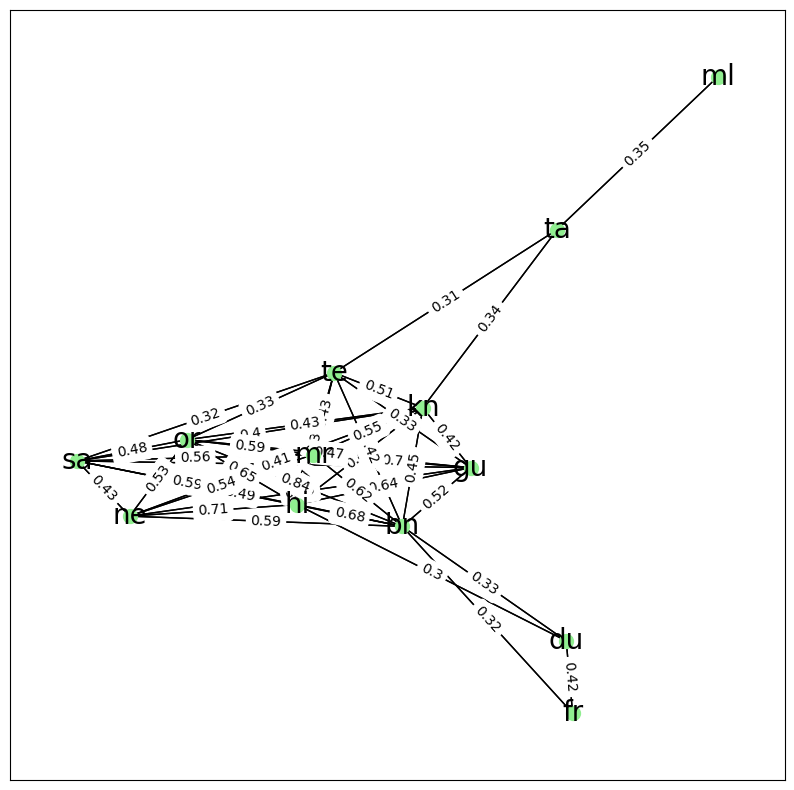

In [91]:
plt.figure(3, figsize=(10,10))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 100, font_size=20, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

# Centrality Measures

In [92]:
from operator import itemgetter
degc = nx.degree_centrality(G)
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('bn', 0.8333333333333333),
 ('hi', 0.75),
 ('kn', 0.75),
 ('sa', 0.6666666666666666),
 ('gu', 0.6666666666666666),
 ('te', 0.6666666666666666),
 ('or', 0.6666666666666666),
 ('mr', 0.6666666666666666),
 ('ne', 0.5833333333333333),
 ('ta', 0.25),
 ('du', 0.25),
 ('fr', 0.16666666666666666),
 ('ml', 0.08333333333333333)]

In [93]:
bet = nx.betweenness_centrality(G)
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('bn', 0.21428571428571427),
 ('ta', 0.16666666666666669),
 ('kn', 0.15367965367965367),
 ('te', 0.12121212121212122),
 ('hi', 0.07034632034632034),
 ('du', 0.007575757575757576),
 ('sa', 0.0021645021645021645),
 ('gu', 0.0021645021645021645),
 ('or', 0.0021645021645021645),
 ('mr', 0.0021645021645021645),
 ('ne', 0.0),
 ('ml', 0.0),
 ('fr', 0.0)]

In [94]:
clos = nx.closeness_centrality(G)
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('kn', 0.8),
 ('bn', 0.8),
 ('hi', 0.75),
 ('te', 0.75),
 ('sa', 0.7058823529411765),
 ('gu', 0.7058823529411765),
 ('or', 0.7058823529411765),
 ('mr', 0.7058823529411765),
 ('ne', 0.6666666666666666),
 ('ta', 0.5217391304347826),
 ('du', 0.5),
 ('fr', 0.48),
 ('ml', 0.35294117647058826)]

In [95]:
pgr=nx.pagerank(G)
sorted(pgr.items(), key=itemgetter(1), reverse=True)

[('bn', 0.1218772725928268),
 ('hi', 0.11356440444542754),
 ('mr', 0.10257180003201234),
 ('kn', 0.09531958404147776),
 ('or', 0.09523173398607959),
 ('gu', 0.08861818762689236),
 ('sa', 0.08358753225527873),
 ('ne', 0.08159874300760006),
 ('te', 0.07582061954709093),
 ('ta', 0.04671929110024489),
 ('du', 0.03866489967519517),
 ('fr', 0.030986774478319656),
 ('ml', 0.025439157211554007)]

# Clustering

In [96]:
nx.average_clustering(G)

0.7571428571428572

In [97]:
nx.clustering(G)

{'sa': 0.9642857142857143,
 'hi': 0.7777777777777778,
 'gu': 0.9642857142857143,
 'ta': 0.3333333333333333,
 'te': 0.7857142857142857,
 'kn': 0.7777777777777778,
 'or': 0.9642857142857143,
 'mr': 0.9642857142857143,
 'ne': 1.0,
 'bn': 0.6444444444444445,
 'ml': 0,
 'fr': 1.0,
 'du': 0.6666666666666666}

In [98]:
list(nx.find_cliques(G))

[['ml', 'ta'],
 ['bn', 'fr', 'du'],
 ['bn', 'hi', 'or', 'sa', 'kn', 'gu', 'mr', 'te'],
 ['bn', 'hi', 'or', 'sa', 'kn', 'gu', 'mr', 'ne'],
 ['bn', 'hi', 'du'],
 ['ta', 'te', 'kn']]


[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


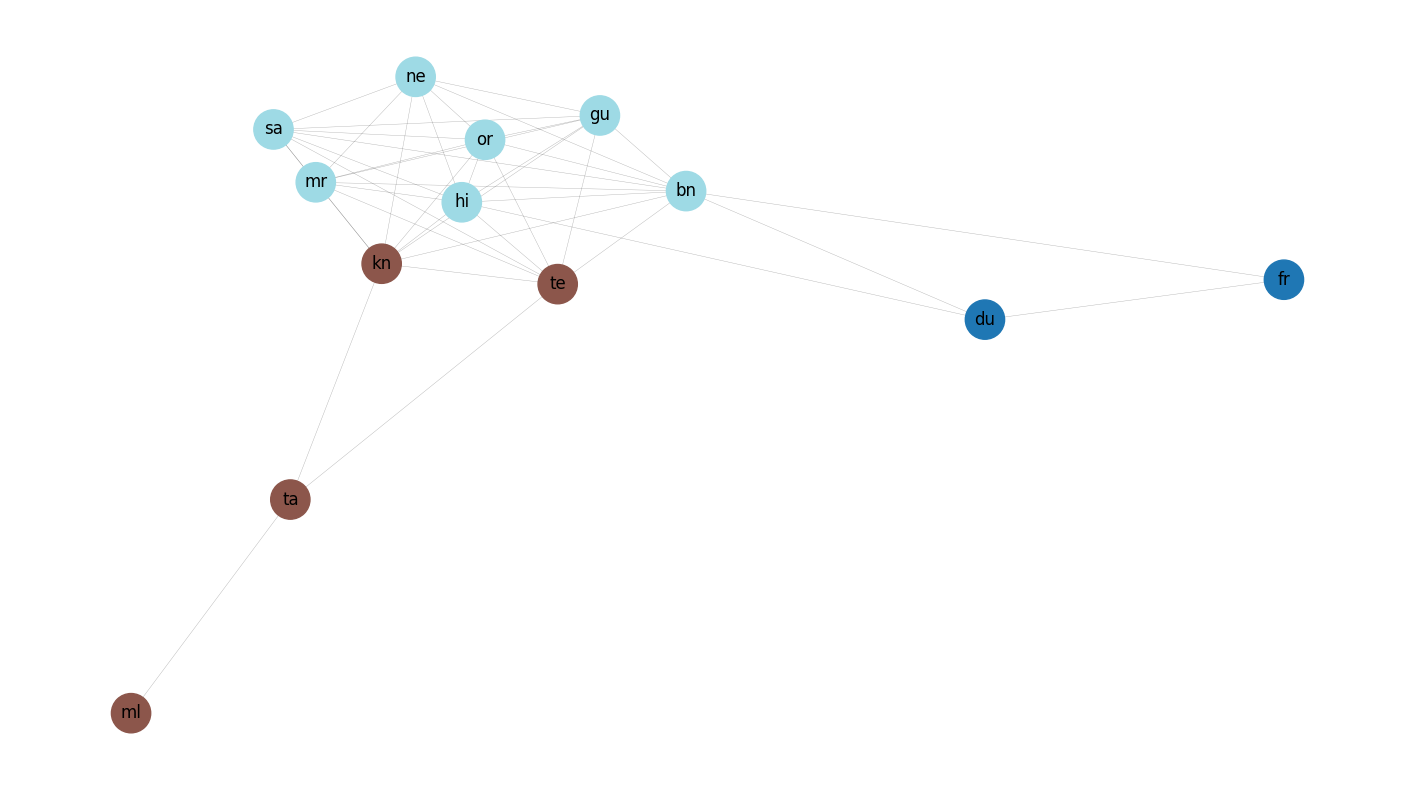

In [99]:
!pip install python-louvain
from community import community_louvain
comms = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(18, 10))
plt.axis('off')
# Use matplotlib colormap : https://matplotlib.org/gallery/color/colormap_reference.html
nx.draw_networkx_nodes(G, pos, comms.keys(), node_size=800, cmap=plt.cm.tab20, node_color=list(comms.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.3)
nx.draw_networkx_labels(G, pos=pos)
plt.show(G)

# Inferences

From the community we can clearly see that Indo-dravidian languages(kannada, tamil,telugu and malayalam) are more similar to eachother and Indo-Aryan languages (sanskrit, hindi,marathi,etc) .
We can also see that Languages like Nepali have been very influenced by sanskrit and are similar to Indi Aryan languages 
Tamil spoken in SriLanka is very similar to that spoken in India  thus enabling us to understand the influnnce Indian rulers have had on the Indian subcontinent .

As a past of our reasearch we came across what are called classical languages 
Guidelines for declaring a language as ‘Classical’ are:
1. High antiquity of its early texts/recorded history over a period of 1500-2000 years;
2. A body of ancient literature/texts, which is considered a valuable heritage by generations of speakers;
3. The literary tradition be original and not borrowed from another speech community;
4. The classical language and literature being distinct from modern, there may also be a discontinuity between the classical language and its later forms or its offshoots.

The languages that are considered Classical include (TAMIL , TELUGU , KANNADA , MALAYALAM , SANSKRIT) and all though these regions in south india were ruled by the French and Dutch these languages show alomost no influnce of foreign languages on them . this can also been seen on the graph as there are no edges between French and Dutch and the classical languages

This can be further extended to Indo-european languages and also other south-east asian languages , as our history shows that the rulers from south of india have once ruled acorss the seas and in present day countries like Thailand , Indonasia and Cambodia which show great influence of Indian style of architecture , culture and even religion.